In [3]:
%matplotlib inline
import pylab as plt
import numpy as np

In [13]:
# print activation function plots

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
def relu(x):
    return np.maximum(0, x)
def leaky_relu(x, alpha=0.2):
    return np.select([x < 0, x >= 0], [alpha*x, x])
def elu(x, alpha=0.3):
    return np.select([x < 0, x >= 0], [alpha * (np.exp(x) - 1.), x])
def swish(x):
    return x * sigmoid(x)
def linear(x):
    return x
def softmax(x):
    return np.exp(x) / np.exp(x).sum()

def decorate(a): a.spines['left'].set_position('zero'); a.spines['right'].set_color('none'); a.spines['bottom'].set_position('zero'); a.spines['top'].set_color('none');  a.grid(True); 

x = np.linspace(-6,6,100); 
funcs = [sigmoid, tanh, relu, leaky_relu, elu, swish, linear, softmax]
funcs_names = ['sigmoid', 'tanh', 'relu', 'leaky_relu', 'elu', 'swish', 'linear', 'softmax']
for f, fname in zip(funcs, funcs_names):
    fig, ax = plt.subplots(1,1, figsize=(5,5))
    ax.plot(x, f(x), lw=3)
    decorate(ax)
    fig.savefig('./images/activation_functions/{}.png'.format(fname), dpi=150, transparent=True)
    plt.close()

# Deep Learning for Biomedicine with Keras
## Activation and Initialization



<img src="./images/segmentation.png" width="30%" align="right">


[*Walter de Back*](http://walter.deback.net)

Institute for Medical Informatics and Biometry (IMB)  
*"Carl Gustav Carus"* Faculty of Medicine  
TU Dresden

[GitLab repo](https://gitlab.com/wdeback/dl-keras-tutorial)

# Training neural networks

<img src="./images/neural_nets_learning.png" width="60%" align="right">


1. **Forward pass**
2. Compute loss
3. Back propagation
4. Gradient descent

<div class="reference">
Source: [Angermüller et al., Mol Sys Biol, 2016](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4965871/pdf/MSB-12-878.pdf)
</div>

### Neuron

<img src="./images/neuron.jpg" width="50%" align="right">


### Neuron

<img src="./images/neuron.jpg" width="40%" align="right">

1. Weighted sum: 
$$\hat{y} = \sum_{i=0}^{n} w_{i} \cdot x_{i} + b$$
2. Activation function:
$$y = f(\hat{y})$$

$$ y = f \left( \sum_{i=0}^{n} w_{i} \cdot x_{i} + b \right) $$

# Activation functions

- Non-linear transformation of inputs:
$$ y = f \left( \sum_{i=0}^{n} w_{i} \cdot x_{i} + b \right) $$
- Why non-linear? 
  

  - without activation function (linear or identity function), neurons would only perform linear transformation  
`y = dot(W, x) + b`
  - combination of linear functions remains linear function
  - neural network could not express more complex functions


  - Note: piece-wise linear is also nonlinear 

## Common activation functions

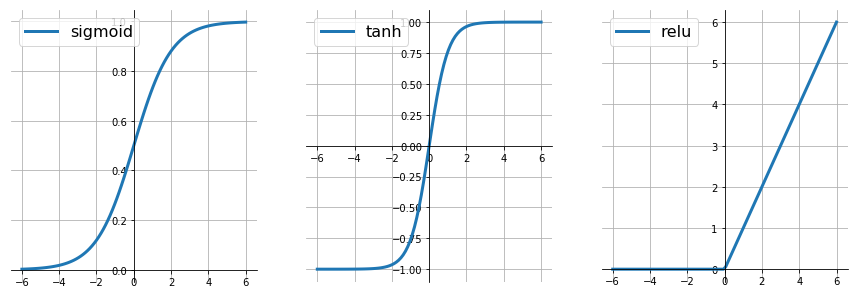

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
def relu(x):
    return np.maximum(0, x)

x = np.linspace(-6,6,100); fig, ax = plt.subplots(1,3, figsize=(15,5),sharey=False)
_ = ax[0].plot(x, sigmoid(x), lw=3, label='sigmoid')
_ = ax[1].plot(x, tanh(x),    lw=3, label='tanh')
_ = ax[2].plot(x, relu(x),    lw=3, label='relu')
def decorate(a): a.legend(fontsize=16); a.spines['left'].set_position('zero'); a.spines['right'].set_color('none'); a.spines['bottom'].set_position('zero'); a.spines['top'].set_color('none');  a.grid(True); 
for a in ax: decorate(a)

## Common activation functions: `sigmoid`

<img src="./images/sigmoid-derivative.png" width="25%" align="right"><img src="./images/sigmoid-activation-function.png" width="25%" align="right">

Takes real-valued input and “squashes” it into range between 0 and 1. Very common historically!

$f(x) = \frac{1}{(1 + e^{-x})}$

(+) biological interpretation: 0 = neuron not firing, 1 = firing at max freq  

(-) [vanishing gradient](https://cs224d.stanford.edu/notebooks/vanishing_grad_example.html): saturation prevents error back propagation  
(-) sensitive to initialization: high init values kill gradients  
(-) no zero centered: gradient all same sign during backprop  
(-) expensive: `exp()` is computationally expensive   


## Common activation functions: `tanh`

<img src="./images/tanh-derivative.png" width="22%" align="right"><img src="./images/tanh-1.png" width="25%" align="right">


Takes real-valued input and “squashes” it into range between -1 and 1.  

$f(x) = \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}$

(+) zero-centered: preferred over sigmoid  
(-) [vanishing gradient](https://cs224d.stanford.edu/notebooks/vanishing_grad_example.html)  
(-) sensitive to initialization  
(-) expensive   


## Common activation functions: `relu`

<img src="./images/relu-derivative.png" width="22%" align="right"><img src="./images/relu-activation-function-1.png" width="25%" align="right">


Rectified linear unit. Most popular currently.

$f(x) = max(0,x)$

 Piecewise linear function with 
- identity function $f(x)=x \text{ for } x>=0$
- constant $f(x)=0 \text{ for } x<0$.  

(+) easy to compute  
(+) fast convergence ([upto 6x faster](http://www.cs.toronto.edu/~fritz/absps/imagenet.pdf))  
(+) no vanishing gradient for `x>0`  
(-) vanishing gradient for `x<0`  
(-) discontinuity: gradient undefined for `x==0`  



## Other activation functions

In [ ]:
x = np.linspace(-6,6,100)
fig, ax = plt.subplots(1,5, figsize=(25,5),sharey=False)
    
def leaky_relu(x, alpha):
    return np.select([x < 0, x >= 0], [alpha*x, x])
def elu(x, alpha):
    return np.select([x < 0, x >= 0], [alpha * (np.exp(x) - 1.), x])
def swish(x):
    return x * sigmoid(x)
def linear(x):
    return x
def softmax(x):
    return np.exp(x) / np.exp(x).sum()

for a in ax: decorate(a)
    

## Leaky ReLU and PReLU

<img src="./images/leaky-relu-activation.png" width="25%" align="right">

Leaky ReLU and parameteric ReLU

$f(x) = \begin{cases} x & \text{if } x>0 \\ \alpha x & \text{otherwise} \end{cases}$


(+) mitigate vanishing gradient issue  
(+) fast convergence ([upto 6x faster](http://www.cs.toronto.edu/~fritz/absps/imagenet.pdf))  
(-) mixed empirical results

- Difference between LeakyReLU and PReLU: 
    - LeakyReLU: $\alpha$ is fixed small value.
    - PReLU: $\alpha$ is a learned hyperparameter.

## Swish

<img src="./images/swish.jpg" width="25%" align="right">

Recently proposed [Ramachandran, 2017](https://arxiv.org/pdf/1710.05941) smooth non-monotonic activation function:

$f(x) = x \cdot \sigma(x)$  

where $\sigma(x) = \frac{1}{(1 + e^{-x})}$ (sigmoid)


(+) Similar to ReLU  
(+) Mitigates vanishing gradient  
(+) No discontinuity at $x=0$  
(-) Expensive


## Output: Softmax

Softmax (= normalized exponential) is a *generalization* of the logistic function that "squashes" a **vector** of real $K$ values in the range (0, 1) that **sum up to 1**.

$f(x_j) = \frac{e^{x_j}}{\sum_{i=0}^K e^{x_i}}$

$\sum_{j=0}^K f(x_j) = 1$


- Outputs probabilities per output neuron
- Often used in output layer in classification task
- Often in combination with crossentropy loss function


## Output: Linear

<img src="./images/linear-activation-function.png" width="25%" align="right">

Linear activation function is typically the identity function:

$f(x) = x$

- Not useful as activation for hidden units
- But often used for output layer in regression tasks in combination with mean squared error loss function

| Name | Plot | Expression | Derivative | Pros | Cons | 
| --- | --- | --- | --- | --- | --- | 
| `sigmoid` | <img src="./images/activation_functions/sigmoid.png" width="40%">  | $f(x)=\frac{1}{(1 + e^{-x})} = \sigma(x)$ |  $f'(x)=f(x)(1-f(x))$ | <ul><li>historically, often used</li></ul> | <ul><li>vanishing gradient</li><li>not zero centered</li><li>expensive</li></ul> |
| `tanh` | <img src="./images/activation_functions/tanh.png" width="40%">  | $f(x)=\frac{2}{1+e^{-2x}}-1$ | $f'(x)=1-f(x)^2$ | <ul><li>zero centered</li></ul> | <ul><li>vanishing gradient</li><li>expensive</li></ul> 
| `relu` | <img src="./images/activation_functions/relu.png" width="40%">  | $f(x)=\begin{cases}0 & \text{ for }x<0 \\ x & \text{ for }x\geq0\end{cases} $ | $f'(x)=\begin{cases}0 & \text{ for }x<0 \\ x & \text{ for }x\geq0\end{cases} $ | <ul><li>no vanishing gradient for $x>0$</li><li>cheap</li></ul> | <ul><li>not zero centered</li><li>undefined gradient at $x=0$</li></ul> |
| `leaky relu` | <img src="./images/activation_functions/leaky_relu.png" width="40%">  | $f(x)=\begin{cases}\alpha x & \text{ for }x<0 \\ x & \text{ for }x\geq0\end{cases} $ | $f'(x)=\begin{cases}\alpha & \text{ for }x<0 \\ x & \text{ for }x\geq0\end{cases} $  | <ul><li>no vanishing gradient</li><li>cheap</li></ul> | 
| `prelu` |  <img src="./images/activation_functions/leaky_relu.png" width="40%"> |$f(x)=\begin{cases}\alpha x & \text{ for }x<0 \\ x & \text{ for }x\geq0\end{cases} $ | $f'(x)=\begin{cases}\alpha & \text{ for }x<0 \\ x & \text{ for }x\geq0\end{cases} $  | <ul><li>no vanishing gradient for $x>0$</li><li>cheap</li><li>learnable $\alpha$</li></ul>
| `elu` | <img src="./images/activation_functions/elu.png" width="40%"> |$f(x)=\begin{cases}\alpha(e^x -1) x & \text{ for }x<0 \\ x & \text{ for }x\geq0\end{cases} $ | $f'(x)=\begin{cases}f(x)+\alpha & \text{ for }x<0 \\ x & \text{ for }x\geq0\end{cases} $ |
| `swish` | <img src="./images/activation_functions/swish.png" width="40%">| $f(x)=\frac{x}{(1 + e^{-\beta x})}= x\cdot\sigma(\beta x) $ | $f'(x)=\beta f(x) + \sigma(\beta x)(1-\beta f(x))$ |
| `linear` | <img src="./images/activation_functions/linear.png" width="40%"> | $f(x)=x$  | $f'(x)=1$ | <ul><li>useful in regression models as output layer</li></ul> | <ul><li>not nonlinear</li></ul>
| `softmax` | <img src="./images/activation_functions/softmax.png" width="40%"> | $f_j(x) = \frac{e^{x_j}}{\sum_{i=0}^K e^{x_i}}$ with $\sum_{j=0}^K f_j(x) = 1$ | $\frac{\partial f_i}{\partial x_j} = \begin{cases} f_i(x)(1-f_j(x)) & \text{ for } i=j \\ -f_i(x)f_j(x) & \text{ for } i\neq j  \end{cases}$ [source](https://eli.thegreenplace.net/2016/the-softmax-function-and-its-derivative/) | <ul><li>useful in classification models as output layer</li></ul> |



In [ ]:
(make a cheat sheet table here such as in: https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6)